In [61]:
%matplotlib inline

from movielens import MovieLens
from linUCB import LinUCB
import numpy as np
import matplotlib.pyplot as plt

In [62]:
dataset = MovieLens(variant='ml-100k', pos_rating_threshold=4, data_augmentation_mode='binary_unknown')

data/movielens/ml-100k.zip is already downloaded.
Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.
Positive ratings (>=4) turned to 1, negative to -1, unknown to 0
Created a genre matrix of shape=(1682, 19) and dtype=float64 from u.item.
Created a titles matrix of shape=(1682,) and dtype=object from u.item.
Statistics about self.R:
Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             100000
Known positive ratings:    55375
Known negative ratings:    44625
Ratio of known ratings:    0.06304669364224531
Ratio of positive ratings: 0.034912106604393346
Ratio of negative ratings: 0.028134587037851974
Avg number of positive ratings per user: 58.72216330858961 +- 54.67211827074995
Avg number of negative ratings per user: 47.32237539766702 +- 58.41143787053165


In [63]:
dataset.R

array([[ 1., -1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [64]:
dataset.add_random_ratings(num_to_each_user=10)
R = dataset.R

In [65]:
(user_pos_rats, user_neg_rats) = dataset.get_statistics()

Number of users:           943
Number of items:           1682
Total number of ratings:   1586126
Known ratings:             108792
Known positive ratings:    59801
Known negative ratings:    48991
Ratio of known ratings:    0.06858975894727153
Ratio of positive ratings: 0.03770255326499913
Ratio of negative ratings: 0.030887205682272406
Avg number of positive ratings per user: 63.415694591728524 +- 54.405872754318644
Avg number of negative ratings per user: 51.952279957582185 +- 58.149301862558595


Text(0.5, 1.0, 'Positive ratings per user')

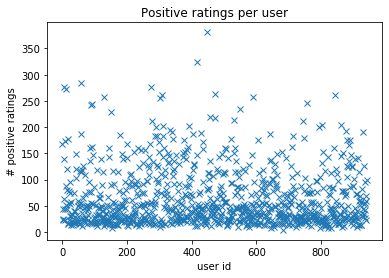

In [66]:
plt.plot(range(R.shape[0]), user_pos_rats, 'x')
plt.ylabel('# positive ratings')
plt.xlabel('user id')
plt.title('Positive ratings per user')

Text(0.5, 1.0, 'Negative ratings per user')

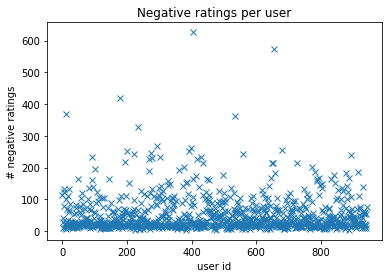

In [67]:
plt.plot(range(R.shape[0]), user_neg_rats, 'x')
plt.ylabel('# negative ratings')
plt.xlabel('user id')
plt.title('Negative ratings per user')

In [8]:
x = np.array([1,2,3])
y = np.array([5,4,3])
np.concatenate((np.tile(x, (3, 1)), np.tile(y, (3, 1))), axis=1)

array([[1, 2, 3, 5, 4, 3],
       [1, 2, 3, 5, 4, 3],
       [1, 2, 3, 5, 4, 3]])

In [9]:
dataset.get_features_of_current_arms(t=0).dtype

dtype('float64')

In [10]:
dataset.get_arm_feature_dim()

1701

In [15]:
p_t = np.array([0,0,-1,0])
max_idxs = np.argwhere(p_t == np.max(p_t)).flatten()
a_t = np.random.choice(max_idxs)
print('p_t:', p_t)
print('max_idxs:',max_idxs)
print('a_t:', a_t)

p_t: [ 0  0 -1  0]
max_idxs: [0 1 3]
a_t: 0


In [11]:
arms_0=dataset.get_features_of_current_arms(0)

In [40]:
rate_0=dataset._get_rating_matrix()[0]
#transform all ratings >3 as 1, smaller or equal to 3 as 0, to mimic the "click status"
rate_0=np.where(rate_0<=3, 0, rate_0)
rate_0=np.where(rate_0>3, 1, rate_0)

Created a rating matrix of shape=(943, 1682) and dtype=float64 from u.data.


In [41]:
rate_0

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
print(arms_0.shape)
print(rate_0.shape)

(1682, 1701)
(943, 1682)


In [34]:
rate_0[0,1:100].reshape(1,-1).transpose().shape

(1682, 1)

In [52]:
dataarray = np.hstack((rate_0[0,0:100].reshape(1,-1).transpose(), arms_0[0:100,:]))

In [53]:
dataarray = np.hstack((np.arange(100).reshape(1,-1).transpose(), dataarray))

In [60]:
dataarray

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  1.,  0.,  0.],
       [ 2.,  1.,  1., ...,  1.,  0.,  0.],
       ...,
       [97.,  1.,  1., ...,  1.,  0.,  0.],
       [98.,  0.,  1., ...,  0.,  0.,  0.],
       [99.,  1.,  1., ...,  1.,  0.,  0.]])

In [59]:
import pickle
pickle.dump(dataarray, open('dataarray.pkl','wb'))